# K-mean clustering для квантования цветов


## <font color='green'>1. Загружаем библиотеки</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## <font color='green'>2. Изучение изображения</font>

Если просто загрузить изображение, то получим массив numpy

In [2]:
image_array = mpimg.imread('palm_trees.jpg')

In [3]:
image_array.shape

(1401, 934, 3)

Выведем изображение на экран с помощью методв __imshow__

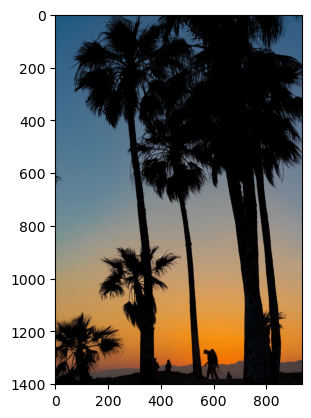

In [4]:
plt.imshow(image_array)

## <font color='green'>3. Квантование цветов</font>

<font color='green'>Преобразуем изображение</font>

Сейчас у нас есть массив с тремя размерностями. Нам нужно преобразовать его в двумерный (H,W,C) --> (H*W, C).

Распакуем кортеж, создав три новые переменные

In [5]:
(h, w, c) = image_array.shape

Преобразуем массив из трехмерного в двумерный

In [6]:
image_array2d = image_array.reshape(h*w, c)

В итоге по строкам у нас будут все пиксели, а по колонкам три базовых цвета

In [7]:
image_array2d.shape

(1308534, 3)

<font color='green'>Создаем модель</font>

Количество кластеров в данном случае отвечает за конечное количетво цветов, в нашем случае их будет 6

In [8]:
model = KMeans(n_clusters=6)

labels = model.fit_predict(image_array2d)

In [9]:
# Посмотрим на центры кластеров
# Это 6 цветовых RGB-кодов!
model.cluster_centers_

array([[  2.75553834,   2.5743035 ,   3.69915959],
       [136.87346857, 143.78637321, 143.93806444],
       [191.59733836, 154.52785285, 109.47855905],
       [ 71.12626205, 109.27464216, 137.6905706 ],
       [219.03818938, 135.40989581,  46.96590869],
       [ 67.24086843,  61.53041228,  61.99602033]])

In [10]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

Теперь мы берем эти 6 цветов и для каждой точки нашего исходного изображения заменяем точки исходного изображения на один из 6 цветов (из переменной __labels__)

In [11]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

Данная команда берет палитру из 6 цветов (rgb_codes) и с помощью этой палитры вернет цвета для нашего массива __labels__. В итоге на выходе мы получим столько же значений, сколько было в массив labels, но теперь вместо 1-5 мы подставили значения из rgb_codes

Теперь мы возвращаем обратно изображение в 3 мерный массив

In [12]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [13]:
quantized_image.shape

(1401, 934, 3)

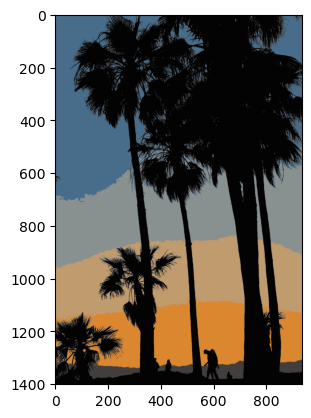

In [14]:
plt.imshow(quantized_image);

Таким образом мы сквантовали цвета, оставив только синий, голубой, бледно-оранжевый, оранжевый, серый и черный